## Application of Differentiation: Newton's Method

<p>In this independent work, you are going to implement an application of differentiation: Newton's Method</p>

<p>For more information, check out the textbook. </p>


In [15]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.abc import x

## Task 1: Derivative
<p>Write a function that takes two inputs: f(x) and a value x_0 and returns m the slope of the tangent to the given function at the given point. </p>

<p> For example, your_function(x**2+2*x+2, 4) should return 10. </p>

In [16]:
def get_slope(f, x0):
    der_f = sym.diff (f, x)
    der_f_l = sym.lambdify(x, der_f)
    return der_f_l (x0)
get_slope (x**2+2*x+2, 4)


10

## Task 2: Tangent Line

<p> Write a function that takes a slope m and a point (x_0, y_0) and returns a line passing through the point with the given slope. </p>

<p> For example, your_function(1, (2, 3)) should return x + 1 </p>

In [17]:
def find_line(m, point):
    y = m * (x - point[0]) + point[1]
    return y
find_line (1,(2,3))


x + 1

## Task 3: Root of a Line

<p> Write a function that takes a linear function that is returned in the previous task, and returns it's root </p>

<p> For example, your_function(x+1) should return -1 </p>

<p> Be careful: Make sure that you have considered those lines without roots </p>

In [ ]:
def find_real_roots(f):
    r = sym.solve(f)
    l = []
    for i in r:
        if i.is_real == True:
            l.append(i)
    if len(l) == 0:
        return "Does not have real roots"
    return l[0]
find_real_roots(x+1)
    


-1

## Task 4: Newton's Method
<p>Implement Newton's Method that takes a function as an input and returns any root of the function.</p>

In [19]:
def Newtons_method(f):
    f_l = sym.lambdify(x, f)
    f_d = sym.diff(f, x)
    f_d = sym.lambdify(x, f_d)
    x_v = 1
    while abs(f_l(x_v)) > 0.0000001:
        x_v = x_v - f_l(x_v)/f_d(x_v)
    return x_v
Newtons_method(x**2-4)
        
        

2.000000000000002

## Task 5: Visualization

<p> Visualize the procedure as much as possible. </p>

In [20]:
def Newtons_method_list(f):
    f_l = sym.lambdify(x, f)
    f_d = sym.diff(f, x)
    f_d = sym.lambdify(x, f_d)
    q = []
    x_v = 1
    q.append(x_v)
    while abs(f_l(x_v)) > 0.0000001:
        x_v = x_v - f_l(x_v)/f_d(x_v)
        q.append(x_v)
    return q
Newtons_method_list(x**2-4)

[1, 2.5, 2.05, 2.000609756097561, 2.0000000929222947, 2.000000000000002]

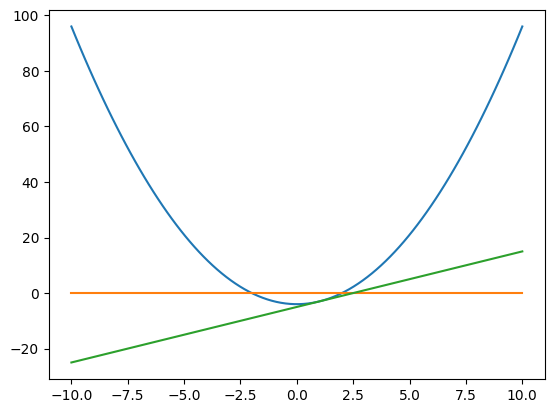

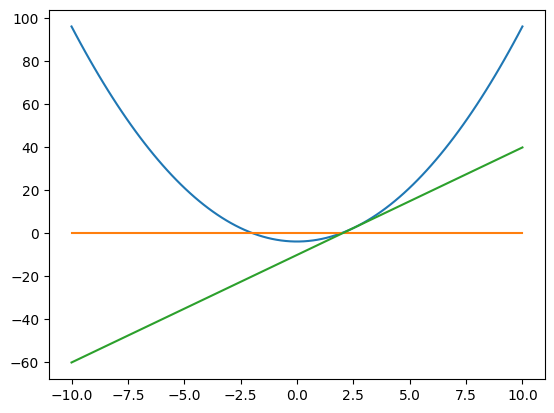

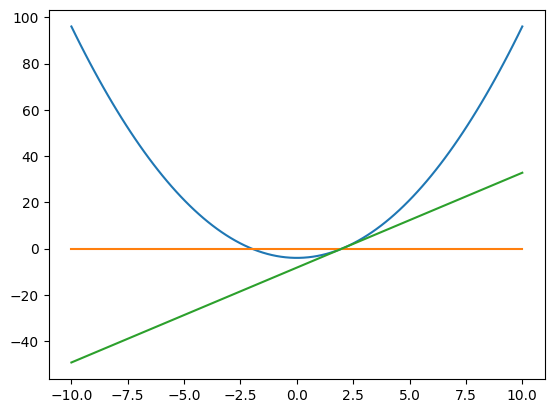

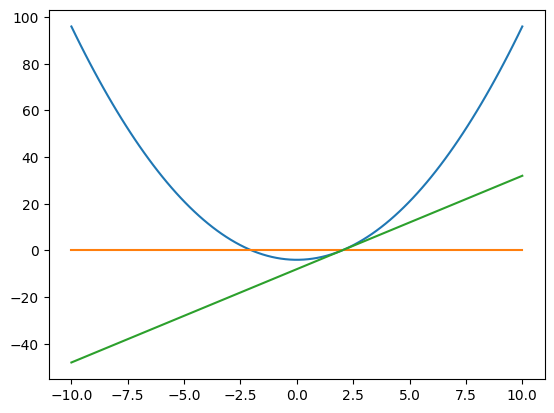

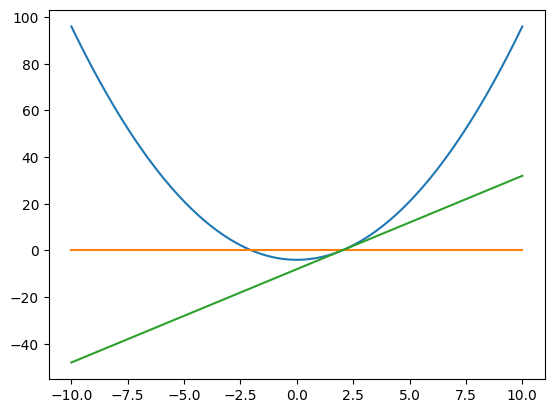

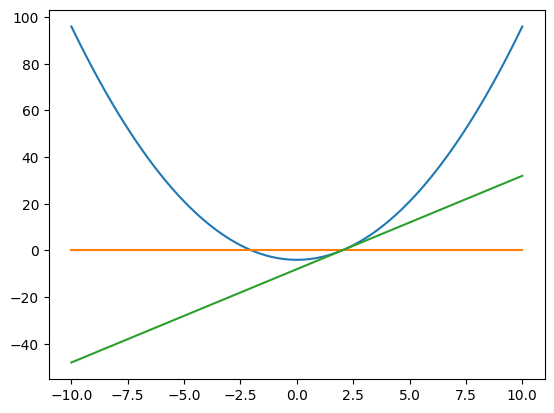

In [21]:
f = x**2-4
f_l = sym.lambdify(x, f)
f_l_dir = sym.diff(f, x)
f_l_dir = sym.lambdify(x, f_l_dir)
NM = Newtons_method_list (f)
x_values = np.linspace(-10, 10, 100)
for i in NM:
    plt.plot(x_values, f_l(x_values))
    plt.plot(x_values, [0 for x in range(100)])
    
    m  = f_l_dir(i)
    a = find_line(m, (i, f_l(i)))
    a = sym.lambdify(x, a)
    plt.plot (x_values, a(x_values))
    
    
    
    plt.show()
    